<a href="https://colab.research.google.com/github/hamzafer/ComputerVisionCOSI/blob/main/A1_Hamza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision - Assignment 1 - Image Filtering

#### 10 points   |   Deadline: 24th of March 2024, 23:59   |   Submission site: https://pradoposgrado2324.ugr.es/course/view.php?id=6425

### Student's name: <mark>Muhammad Hamza Zafar</mark>





---



## Submission rules

For this submission (and the same applies to all other course assignments), code, results, discussion, presentation and analysis of the work carried out must be introduced, all integrated into this same Google Colab Notebook. Please remember that **code and results without an explanatory report are not enough (and, as a consequence, the associated mark would be 0)**. In other words, it is essential that the student demonstrates that he/she understands what is doing, and that he/she masters the fundamentals to successfully carry out the assignment and interpret the results obtained.

The main goal of this assignment is to become familiar with the implementation and use of convolutional filters, as well as the calculation of the derivatives of an image and its possible applications.

The cell layout/structure of this Google Colab Notebook template must be respected.

Only the source code will be delivered (`.ipynb` file incorporating code, results, and explanation of the work performed and the results obtained). The images used will not be submitted (because we all employ the same images, and these are shared in https://pradoposgrado2324.ugr.es/mod/url/view.php?id=66982).

The path for reading images, or any other input file, must always be “/content/drive/My Drive/images/file_name”

The code must be well-commented, and presented with the results obtained in each section along with the corresponding comments and discussion. Again, remember that submitting code without an explanatory report does not score.



---



## Support functions and connection to Google Drive


In [ ]:
# We start by getting access to the drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


For debugging

images: https://drive.google.com/drive/folders/1BcIostL1KJwtZG5wvgQ04_u1lB7r6svy

templae:https://colab.research.google.com/drive/1gpACF89fN70YWtDYvVbsLO1p1_aOyfVf#scrollTo=2Sl_F8ypIPDi

chat: https://chat.openai.com/c/9ed528a9-7c23-42e4-9524-b18d04675f3b

In [ ]:
import pdb

In [ ]:
# We import the modules to use
import os,sys
import cv2, numpy as np, math
from matplotlib import pyplot as plt
# change directory
%cd '/content/drive/My Drive'
#  the current directory
%pwd

# This allows to display images  and to save  them in cells
%matplotlib inline
# this definition allows to read files in a specific path
get_image = lambda route: os.path.join('/content/drive/My Drive/images', route)

/content/drive/My Drive


In [ ]:
'''
This function receives a string with the filename of the image to read,
and a flag indicating if we want to read it in color/RGB (flagColor=1) or gray level (flagColor=0)

Example of use:
im1=readIm(get_image('apple.jpg'),0)

'''
def readIm(filename, flagColor=1):
  # cv2 reads BGR format
  im=cv2.imread(filename)
  # change to  RGB and return the image
  if(flagColor):
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  # change from BGR to grayscale instead if flag is 0
  return cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [ ]:
'''
This function receives an array of arbitrary real numbers (that could include even negative values),
and returns an 'image' in the range [0,1].
flag_GLOBAL allows the user to normalize the whole image (including all channels) or to normalize
each channel/band independently.
'''
def rangeDisplay01(im, flag_GLOBAL= True):
  im = im.astype(float)
  if flag_GLOBAL:
    im = (im - im.min())/(im.max() - im.min())
  else:
    # bands normalization
    for band in range(im.shape[2]):
      im[:, :, band] = (im[:, :, band] - im[:, :, band].min())/(im[:, :, band].max() - im[:, :, band].min())
      # Note: remember that, for plt.imshow with RGB data, the valid range is [0..1] for floats and [0..255] for integers.
  return im

In [ ]:
'''
This function displays a single image, including a title, using a magnification factor.

Example of use:
im1=readIm(get_image('apple.jpg'),0)
displayIm(im1,'Apple',0.5)

'''
def displayIm(im, title='Result',factor= 2):
  # First normalize range
  max=np.max(im)
  min=np.min(im)
  if min<0 or max>255:
    im=rangeDisplay01(im,flag_GLOBAL=True)
  if len(im.shape) == 3:
    # im has three-channels
    plt.imshow(im, cmap='jet')
  else:
    # im has a single-channel
    plt.imshow(im, cmap='gray')
  figure_size = plt.gcf().get_size_inches()
  plt.gcf().set_size_inches(factor * figure_size)
  plt.title(title)
  plt.xticks([]), plt.yticks([])
  plt.show()

This is a test cell to check if the images are being loaded correctly from the given path. ⏰

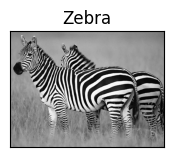

In [ ]:
im1=readIm(get_image('zebra.jpg'),0)
displayIm(im1,'Zebra',0.5)

In [ ]:
'''
This function displays multiple images (including a title and using a magnification factor)
of equal size. The input to the function is a list of images.

Example of use:
im1=readIm(get_image('apple.jpg'),1)
images = [im1,im1,im1]

displayMI_ES(images, title='Apples',factor=1)

'''
def displayMI_ES(vim, title='Result',factor=2):
  # We set the maximun number of images to concatenate by columns
  maxcolumns=3
  # number of images to display
  numberim=len(vim)
  # The simplest case, one row: the maximum number of columns is larger than the images to stack
  # This is, by default, we put together the images column-wise
  if len(vim) < maxcolumns:
    out=vim[0]
    for item in range(1,len(vim)):
      #displayIm(out,str(item),1)
      out=np.hstack((out,vim[item]))

  # Else, if maxcolumns is smaller or equal than the number of images to stack
  else:
    # We check if all rows and columns are going to be 'busy', or if otherwise we need an extra-row
    if np.mod(len(vim),maxcolumns)== 0:
      maxrows=numberim//maxcolumns
    else:
      maxrows=numberim//maxcolumns+1

    # we build up the first block-row
    out=vim[0]
    for item in range(1,maxcolumns):
      out=np.hstack((out,vim[item]))
    # We build up the rest of block-rows
    for block in range(1,maxrows):
      #print(block)
      row=vim[block*maxcolumns]
      for item in range(1,maxcolumns):
        # We still have images to stack
        if block*maxcolumns+item < numberim:
          row=np.hstack((row,vim[block*maxcolumns+item]))
        # We do not have more images, and we have to fill with black
        else:
          row=np.hstack((row,np.zeros(vim[0].shape,dtype=vim[0].dtype)))
          #print(row.dtype)
          # if we don't include ',dtype=vim[0].dtype', np.zeros will include float
          # numbers in the matrix. This will make that the whole matrix will be
          # considered as floats, and values larger than 1 will be clipped to 1,
          # displaying an almost totally white image
      # add the new block-row
      out=np.vstack((out,row))
  return displayIm(out,title,factor)

# **Exercise 1: mask discretization and Gaussian filtering** (4 points).

In this exercise we will learn to discretize convolution masks and apply them to images using OpenCV functions. We also seek to do it in an efficient way, and that is why, in all this assignment, the use of 1D (separable) convolutions is required.

The PDF document about Gaussian discretization, available in PRADO (https://pradoposgrado2324.ugr.es/pluginfile.php/171241/mod_folder/content/0/SupplementaryMaterials/Gaussian_discretization.pdf), can be helpful in the implementation of this first exercise.




## A) (1.5 points)

Compute the 1D discrete masks of the Gaussian function, and both its first and second derivatives (normalized). Consider that the input to such a 1D mask creation function can be both a possible sigma or a possible mask size. Use the following sigma values ($\{1, 2.5, 5\}$) and the following mask size values ($\{5, 9, 15\}$), and display the profile (that is, the silhouette of the masks as 1D functions) to verify that the created masks are correct.

In [ ]:
# Define the Gaussian function
def GaussFunc(x, sigma):
    # c is the normalization constant but we are ignoring like mentioned in the manual, for the discrete case it will be normalized separately
    return (np.exp(-x**2 / (2 * sigma**2)))

# Define the first derivative of the Gaussian function
def GaussDeriv1Func(x, sigma):
    # The derivative of the Gaussian function with respect to x
    return (-x / sigma**2) * np.exp(-x**2 / (2 * sigma**2))

# Define the second derivative of the Gaussian function
def GaussDeriv2Func(x, sigma):
    # The second derivative of the Gaussian function with respect to x
    return (x**2 / sigma**4 - 1 / sigma**2) * np.exp(-x**2 / (2 * sigma**2))

def gaussianMask1D(sigma=0, sizeMask=0, order=0):
    # If sigma is given, calculate the mask size using 3-sigma rule as a default extent
    multiplier = 3
    if sigma > 0 and sizeMask == 0:
      # Calculate the size of the mask
        #pdb.set_trace() # breakpoint
        sizeMask = int(multiplier * sigma) * 2# 17 issue
        # Ensure the mask size is odd
        if sizeMask % 2 == 0:
          sizeMask += 1
    # If the size of the mask is given, calculate sigma if it's not provided
    elif sizeMask > 0 and sigma == 0:
        sigma = (sizeMask - 1) / 6.0
    # Compute the x-values for the mask
    halfSize = sizeMask // 2
    #x = np.linspace(-halfSize, halfSize)
    x = np.arange(-halfSize, halfSize+1)
    #print ("halfSize: ", halfSize, "  x:", x)
    # Select the Gaussian function based on the order
    if order == 0:
        mask = GaussFunc(x, sigma)
    elif order == 1:
        mask = GaussDeriv1Func(x, sigma)
    elif order == 2:
        mask = GaussDeriv2Func(x, sigma)
    else:
        raise ValueError("Order must be 0, 1, or 2.")
    # Normalize the mask so that the sum equals 1
    # Normalize the mask differently based on the order
    if order == 0:
        # Normalize so that the sum equals 1 for the Gaussian function
        mask /= np.sum(mask)
    elif order == 1:
        mask *= sigma
    elif order == 2:
        mask *= (sigma**2)
    else:
        # Normalize so that the sum of the absolute values equals 1 for derivatives
        # mask /= np.sum(np.abs(mask))
        # mask /= np.sum(mask)
        # print("***** Checking if the sum of them are zero: ", np.sum(mask))
        mask = mask

    #print("Mask:", mask, "Sigma:", sigma, "Size of the mask:", sizeMask)
    return mask, sigma, sizeMask # note: that i have changed the definition of this function, now it returns more than one param

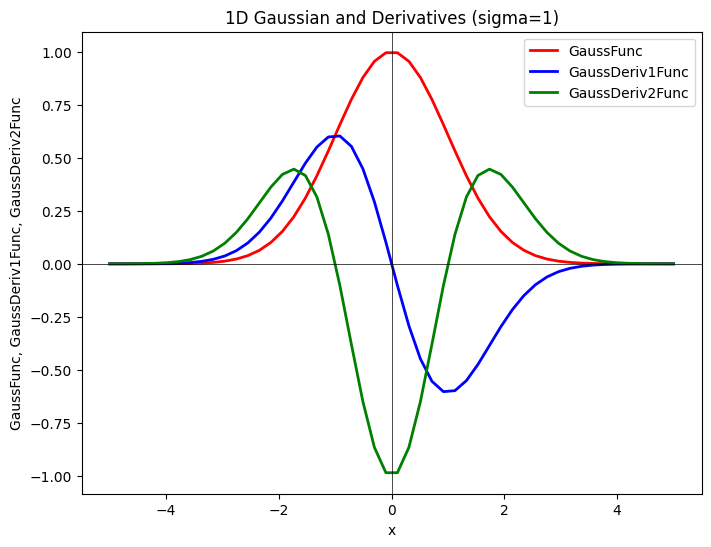

In [ ]:
# With the following figure we check that the implemented Gaussian functions are correct
plt.figure(figsize=(8, 6)) # Else my figure is getting stretched
xvalues = np.linspace(-5, 5)
yvalues1 = GaussFunc(xvalues,1)
yvalues2 = GaussDeriv1Func(xvalues,1)
yvalues3 = GaussDeriv2Func(xvalues,1)
plt.plot(xvalues, yvalues1, lw=2, color='red',
label='GaussFunc')
plt.plot(xvalues, yvalues2, lw=2, color='blue',
label='GaussDeriv1Func')
plt.plot(xvalues, yvalues3, lw=2, color='green',
label='GaussDeriv2Func')
plt.title('1D Gaussian and Derivatives (sigma=1)')
plt.xlabel('x')
plt.ylabel('GaussFunc, GaussDeriv1Func, GaussDeriv2Func')
plt.axhline(0, lw=0.5, color='black')
plt.axvline(0, lw=0.5, color='black')
plt.legend()

WE FIRST SET THE MASK SIZE
Order 0, Mask size 5: Sum = 1.000
Order 1, Mask size 5: Sum = -0.000
Order 2, Mask size 5: Sum = -0.011


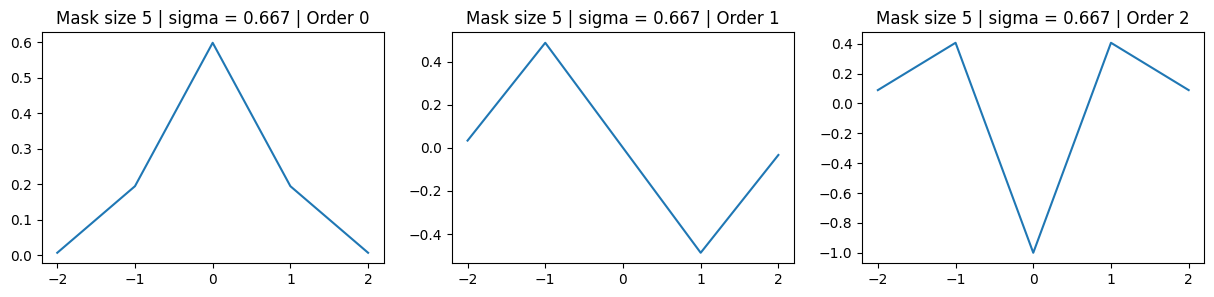

Order 0, Mask size 9: Sum = 1.000
Order 1, Mask size 9: Sum = 0.000
Order 2, Mask size 9: Sum = -0.025


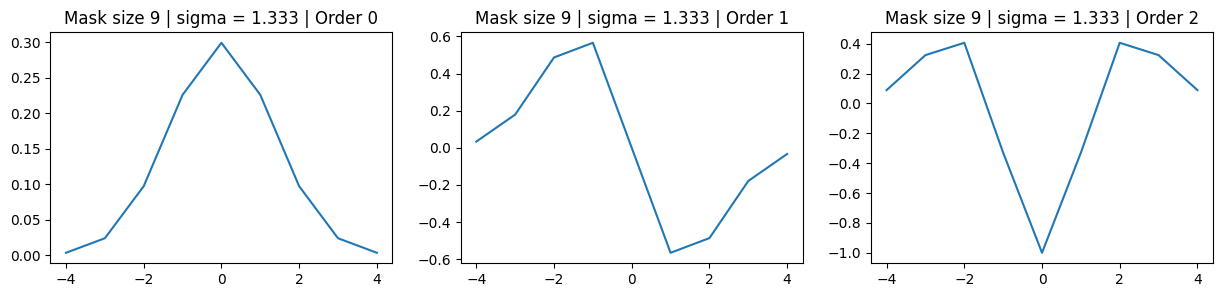

Order 0, Mask size 15: Sum = 1.000
Order 1, Mask size 15: Sum = 0.000
Order 2, Mask size 15: Sum = -0.081


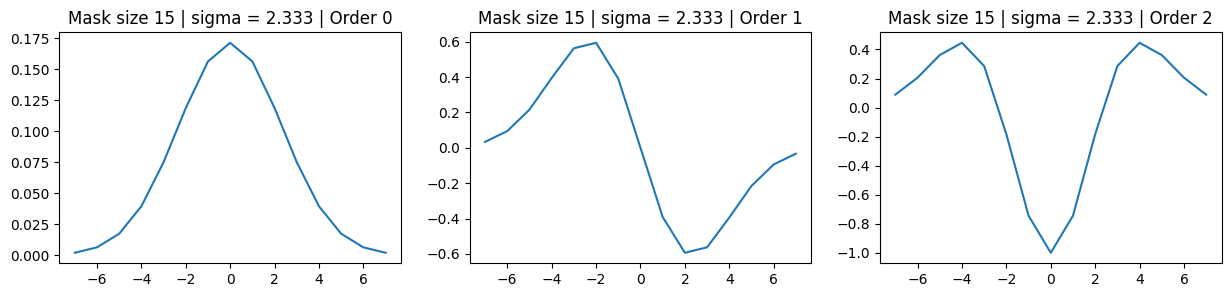

WE NOW SET SIGMA
Order 0, Sigma 1: Sum = 1.000
Order 1, Sigma 1: Sum = -0.000
Order 2, Sigma 1: Sum = -0.010


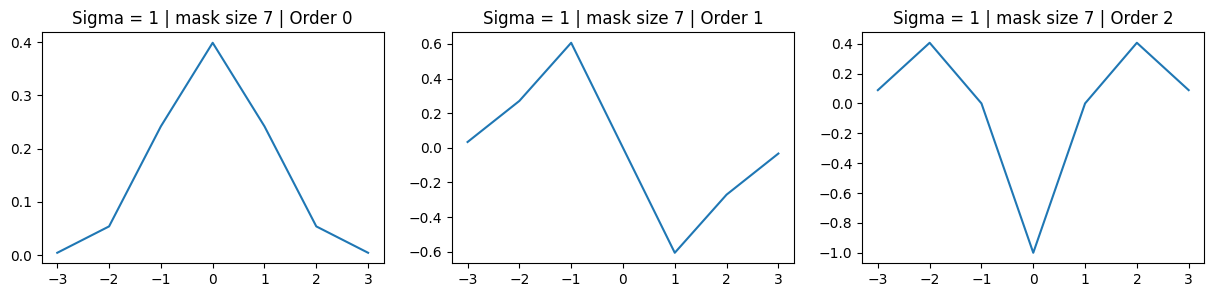

Order 0, Sigma 2.5: Sum = 1.000
Order 1, Sigma 2.5: Sum = 0.000
Order 2, Sigma 2.5: Sum = -0.160


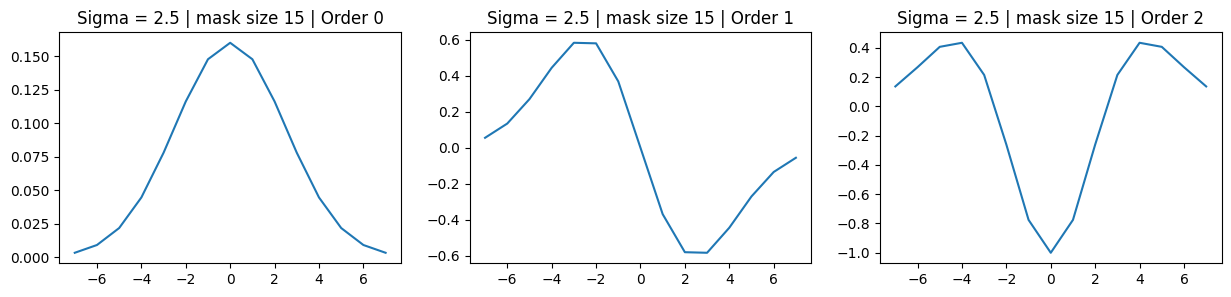

Order 0, Sigma 5: Sum = 1.000
Order 1, Sigma 5: Sum = -0.000
Order 2, Sigma 5: Sum = -0.251


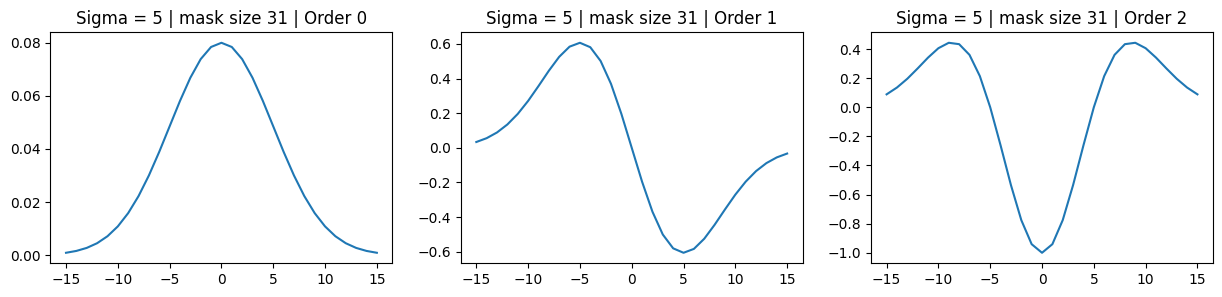

In [ ]:
sigma_values = [1, 2.5, 5]
size_masks = [5,9,15]

plt.rcParams["figure.figsize"] = (15,3) # To adjust height and width (axis)
print('WE FIRST SET THE MASK SIZE')
for sizeMask in size_masks:
    fig, axs = plt.subplots(1, 3)
    # Correctly calculate x_range to match the generated mask
    x_range = np.arange(-sizeMask // 2 + 1, sizeMask // 2 + 1)
    for order in range(3):
        mask, sigma, _ = gaussianMask1D(sizeMask=sizeMask, order=order)
        print(f"Order {order}, Mask size {sizeMask}: Sum = {np.sum(mask):.3f}")
        axs[order].plot(x_range, mask)
        axs[order].set_title(f'Mask size {sizeMask} | sigma = {sigma:.3f} | Order {order}')
    plt.show()

print('WE NOW SET SIGMA')
for sigma in sigma_values:
    fig, axs = plt.subplots(1, 3)
    for order in range(3):
        mask, _, sizeMask = gaussianMask1D(sigma=sigma, order=order)
        print(f"Order {order}, Sigma {sigma}: Sum = {np.sum(mask):.3f}")
        # Correctly calculate x_range to match the generated mask
        x_range = np.arange(-sizeMask // 2 + 1, sizeMask // 2 + 1)
        axs[order].plot(x_range, mask)
        axs[order].set_title(f'Sigma = {sigma} | mask size {sizeMask} | Order {order}')
    plt.show()

### Report Point 1A
#### issue
- tried to understand but couldnt: https://pradoposgrado234.uner.es/pluginfile.php/117241/mod_folder/content/0/SupplementaryMaterials/Gaussian_discretization.pdf
- issue when norm the order 1 and 2, wasnt considering the neg values - abs
- x axis were starting from 0, adjusted them
- made sure the sum approx is 1
- https://observablehq.com/@giobonanrd/gaussian-kernel-calculator played with the slider to match the kernel values.
- http://dev.theomader.com/gaussian-kernel-calculator not working from slides
- assignment manual: 2 [3-g] + 1 = T , applied the same with rounding and adding 1 only if the value is even.
- 3 sigma rule - min(k) >= 3sigma
- Given a sigma (σ), calculate the mask size (T) using the formula T = 2k + 1, where k = (T - 1) / 6.
- the sum of coefficients for the second derivative kernel will not necessarily add up to 0.

In [ ]:
# just interested.
sobel3x3 = cv2.getDerivKernels(1,0,3)
np.outer(sobel3x3[0],sobel3x3[1]) # gy
# np.outer(sobel3x3[1],sobel3x3[0]) # gx
# cool

array([[-1., -2., -1.],
       [ 0.,  0.,  0.],
       [ 1.,  2.,  1.]], dtype=float32)

## B) (1.5 points)

Read a grayscale image and filter it showing the result of the convolution with a Gaussian, with the first derivative of the Gaussian (both in $X$ and $Y$), and with the second derivative of the Gaussian (both in $X$ and $Y$). Use the following sigmas: $\{0.75,2,5,10,15\}$. Display all images within the same canvas, as shown below. In this section, the OpenCV function `sepFilter2D()` must be used with the masks calculated in the previous exercise.




In [ ]:
"""Return a label for the derivative based on the orders."""
def get_derivative_label(orders):
    if orders == [0, 0]:
        return f'Gaussian smoothing {orders}'
    elif orders == [0, 1] or orders == [1, 0]:
        return f'First derivative {orders}'
    elif orders == [0, 2] or orders == [2, 0]:
        return f'Second derivative {orders}'
    elif orders == [2, 2]:
        return f'Second derivative in both directions LoG {orders}'
    else:
        return f'Derivative {orders}'

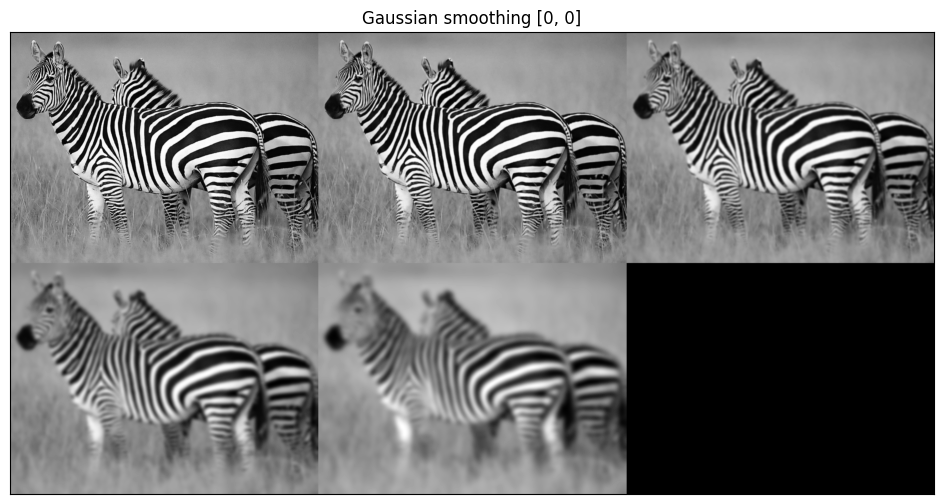

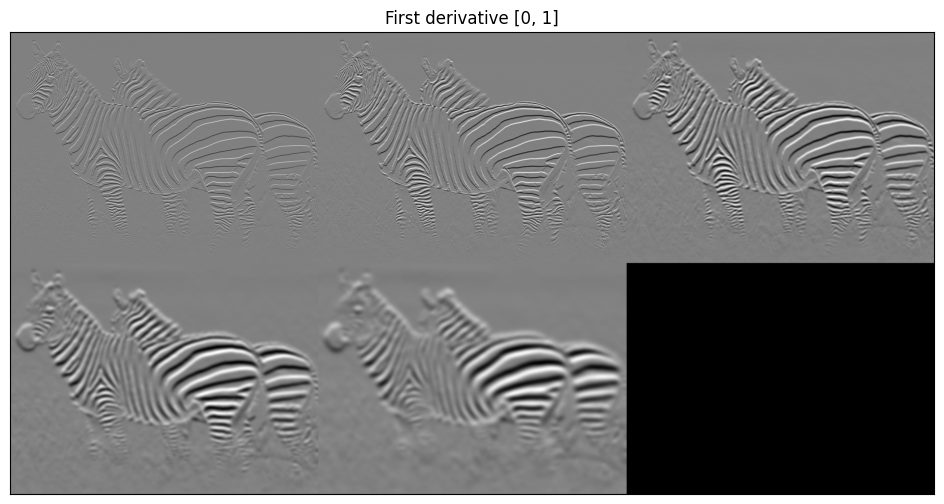

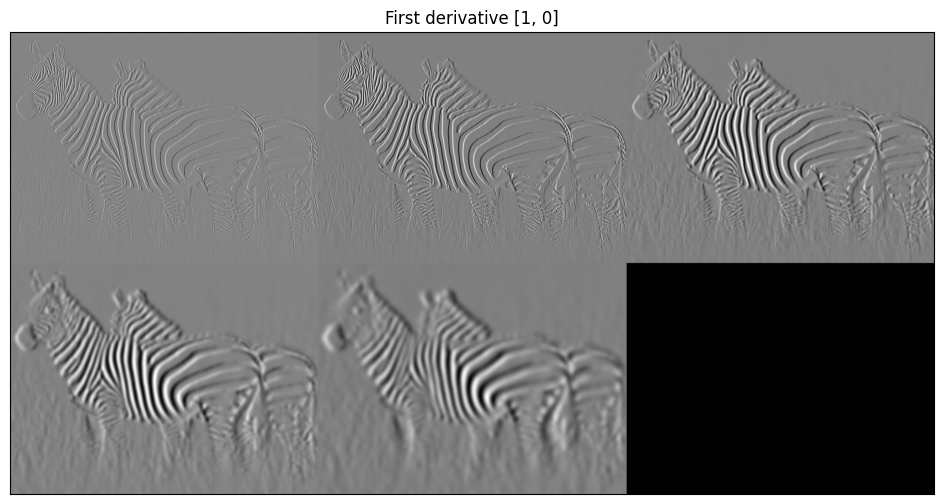

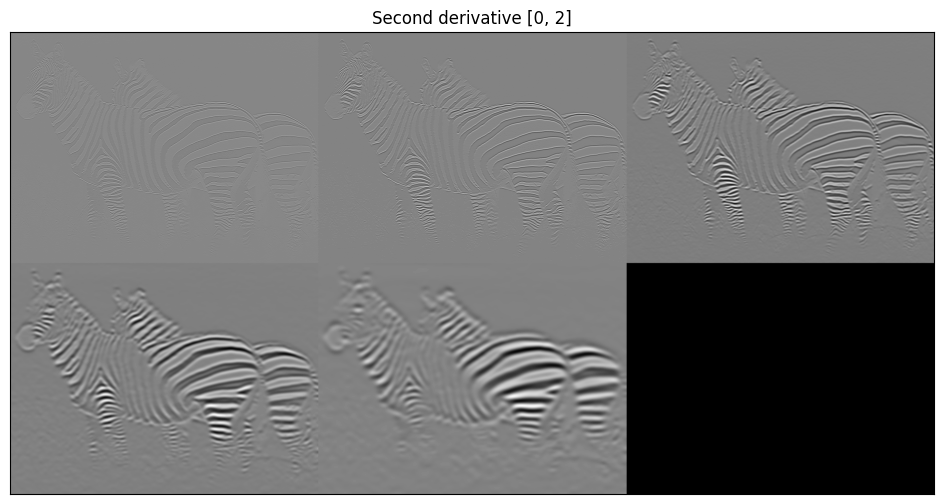

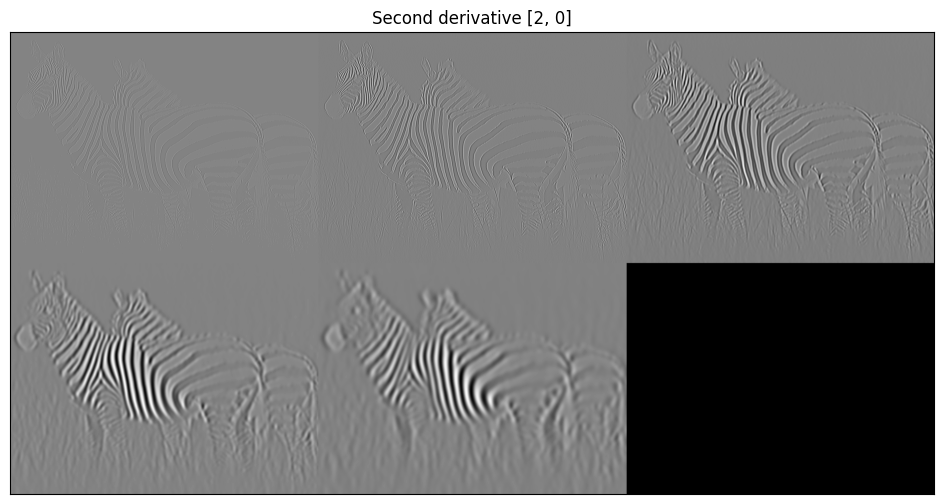

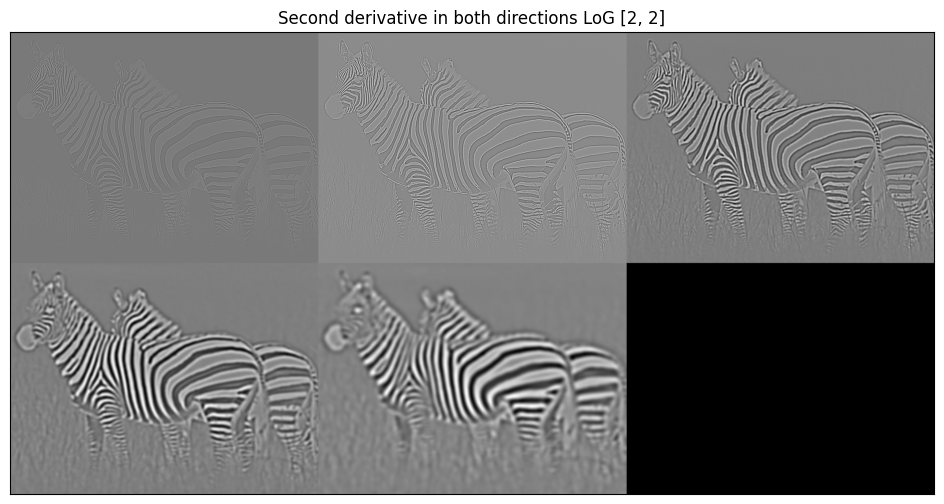

In [ ]:
import cv2
import numpy as np

def my2DConv(im, sigma, orders):
    # ddepth = -1
    ddepth = cv2.CV_64F
    # Calculate the masks
    maskG, _, _ = gaussianMask1D(sigma=sigma, order=0)
    maskDG, _, _ = gaussianMask1D(sigma=sigma, order=1)
    mask2DG, _, _ = gaussianMask1D(sigma=sigma, order=2)
    # Reshape the 1D masks for 2D convolution - seperable ?
    maskG = maskG.reshape(1, -1)
    maskDG = maskDG.reshape(1, -1)
    mask2DG = mask2DG.reshape(1, -1)

    if orders == [0, 0]:  # Gaussian smoothing
        return cv2.sepFilter2D(im, ddepth, maskG, maskG)
    elif orders == [1, 0]:  # First derivative in X
        return cv2.sepFilter2D(im, ddepth, maskDG, maskG)
    elif orders == [0, 1]:  # First derivative in Y
        return cv2.sepFilter2D(im, ddepth, maskG, maskDG.T) # transpose
    elif orders == [2, 0]:  # Second derivative in X
        return cv2.sepFilter2D(im, ddepth, mask2DG, maskG)
    elif orders == [0, 2]:  # Second derivative in Y
        return cv2.sepFilter2D(im, ddepth, maskG, mask2DG.T)
    elif orders == [2, 2]:  # Second derivative in X and Y (Laplacian) - slide 33 - curious
        # Apply the second derivative mask in the X direction and the first derivative in the Y direction
        laplacianX = cv2.sepFilter2D(im, ddepth, mask2DG, maskG)
        laplacianY = cv2.sepFilter2D(im, ddepth, maskG, mask2DG.T)
        LoG = (laplacianX + laplacianY) * (sigma ** 2)
        return LoG
    else:
        print('Error in order of derivative')
        return None

# let's check the function
im=cv2.imread(get_image('zebra.jpg'),0).astype(np.float64) #float for precise
sigma_values = [0.75, 2, 5, 10, 15]

# Define all possible orders for the derivatives to be computed
all_orders = [[0, 0], [0, 1], [1, 0], [0, 2], [2, 0], [2, 2]]

# For each set of orders, compute the filter response for each sigma and display
for orders in all_orders:
    vim = []  # List to hold the output images for the current set of orders
    for sigma in sigma_values:
        filtered_image = my2DConv(im, sigma, orders)
        normalized_image = rangeDisplay01(filtered_image, True)
        vim.append(normalized_image)
    # Display the images for the current set of orders
    displayMI_ES(vim, get_derivative_label(orders), 2)

### Report Point 1B
- Reshape
- depth
- LoG
- new function label
- explain output
- 2D sep: https://bartwronski.com/2020/02/03/separate-your-filters-svd-and-low-rank-approximation-of-image-filters/

## C) (1 point)

Use the OpenCV function `sepFilter2D()` and $\sigma=3.0$ to calculate the gradient (4 images: $X$ derivative, $Y$ derivative, magnitude and orientation) and the Laplacian of Gaussian.

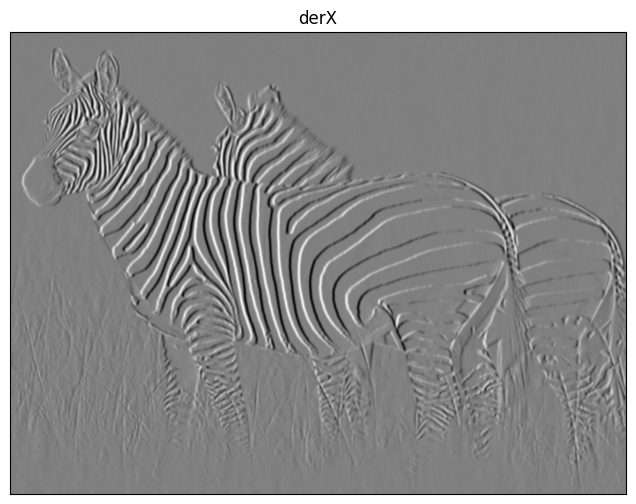

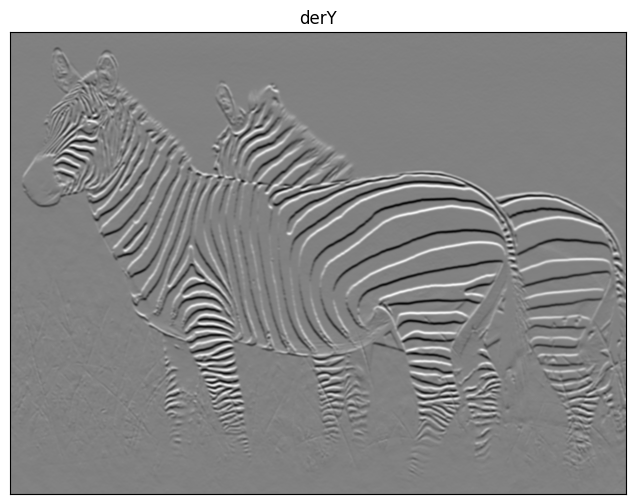

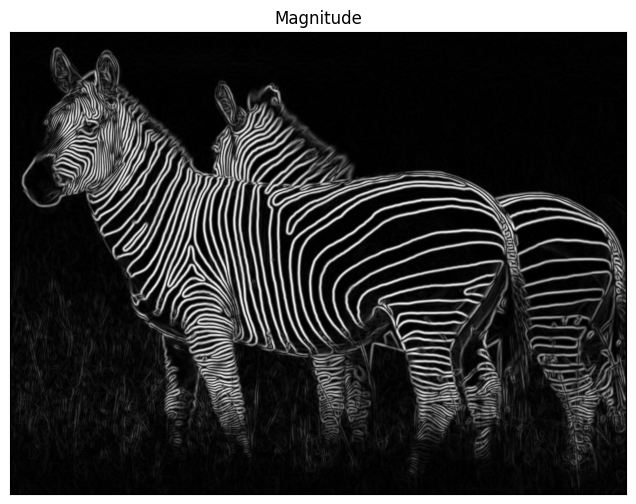

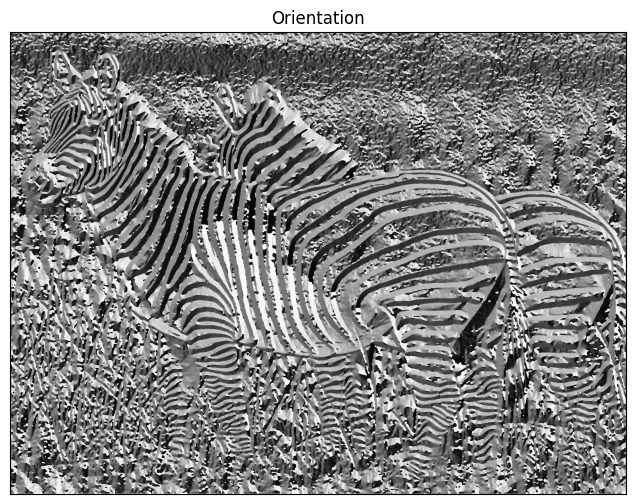

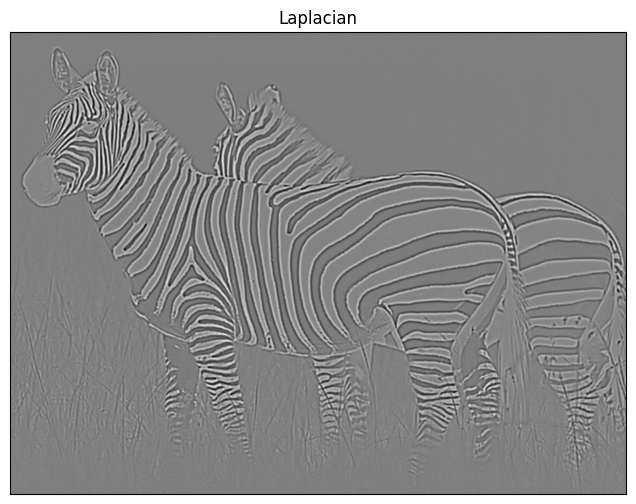

In [ ]:
# testing
# If the rank is not 1 → it is not directly separable! - slides

# G = np.array([[0,1,0],[1,-4,1],[0,1,0]])
# np.linalg.matrix_rank(G)

# G = np.outer([1,2,1],[1,2,1])
# np.linalg.matrix_rank(G)

# G = np.outer([1,2,1],[-1,0,1])
# np.linalg.matrix_rank(G)

# let's check the function
im=cv2.imread(get_image('zebra.jpg'),0).astype(np.float64) #float for precise
sigma = 3.0

# Gradient in X and Y direction
grad_x = my2DConv(im, sigma, [1, 0]) # why not normalize
grad_y = my2DConv(im, sigma, [0, 1])

# Calculate the magnitude and orientation of the gradient
magnitude = rangeDisplay01(np.sqrt(grad_x**2 + grad_y**2), True) # rangeDisplay01?
orientation = rangeDisplay01(np.arctan2(grad_y, grad_x), True)

# Laplacian of Gaussian
laplacian = rangeDisplay01(my2DConv(im, sigma, [2, 2]), True) #

# Use displayIm function to show the images with the titles
displayIm(grad_x, 'derX')
displayIm(grad_y, 'derY')
displayIm(magnitude, 'Magnitude')
displayIm(orientation, 'Orientation')
displayIm(laplacian, 'Laplacian')

### Report Point 1C
- Sigma square multiply
- why not normalize x y grad
- explain results

# **Exercise 2**:  Gaussian and Laplacian pyramids (3 points)







## A) (1.5 points)

Build a 4-level Gaussian pyramid using $7\times7$ size Gaussian masks. Using the OpenCV `pyrUp()` and `pyrDown()` functions is not allowed.

In [ ]:
'''
This function displays a pyramid of images, providing as input the list of images to display.

Example of use:
im1=readIm(get_image('apple.jpg'),1)
images = [im1, cv2.resize(im1,(im1.shape[0]//2,im1.shape[1]//2),cv2.INTER_LINEAR), cv2.resize(im1,(im1.shape[0]//4,im1.shape[1]//4),cv2.INTER_LINEAR), cv2.resize(im1,(im1.shape[0]//8,im1.shape[1]//8),cv2.INTER_LINEAR), cv2.resize(im1,(im1.shape[0]//16,im1.shape[1]//16),cv2.INTER_LINEAR)]

displayPyramid(images, title='Apples Pyramid')

'''
def displayPyramid(vim, title='result'):
  temp = np.zeros_like(vim[0])
  if np.mod(temp.shape[1],2)==0:
    h = temp[:, :temp.shape[1]//2]
  else:
    h = temp[:, :(temp.shape[1]//2)+1]
  out = np.hstack((temp, h))
  top = 0
  out[0:vim[0].shape[0], 0:vim[0].shape[1]] = vim[0]
  left = vim[0].shape[1]
  for i in range(1, len(vim)):
    out[top:top+vim[i].shape[0], left:left + vim[i].shape[1]] = vim[i]
    top += vim[i].shape[0]
  displayIm(out, title)

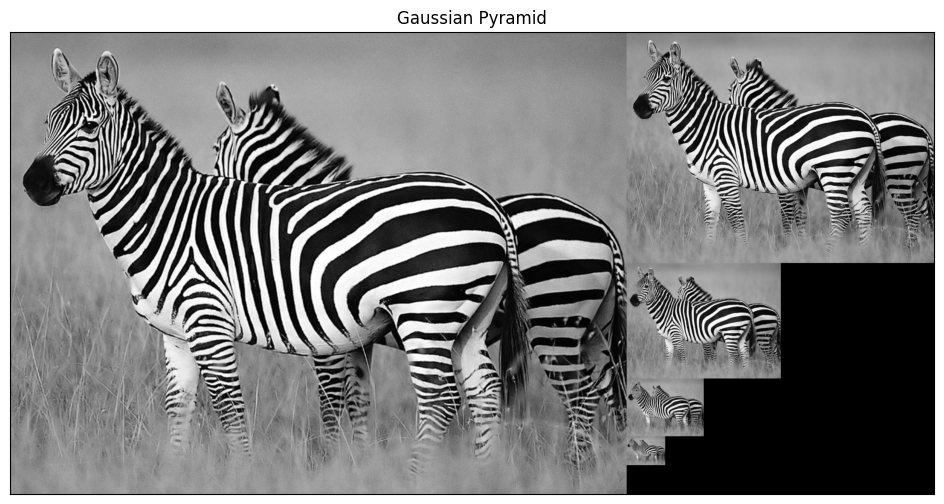

In [ ]:
def pyramidGauss(im, sizeMask=7, nlevel=4):
    # Create the Gaussian mask for blurring
    mask, sigma, _ = gaussianMask1D(sizeMask=sizeMask, order=0)
    # print(sigma) - 1 as it should be with the mask size = 7
    # Initialize the pyramid with the original image
    vim = [im]
    for i in range(1, nlevel):
        # Blur the current level's image with the Gaussian mask
        im_blurred = my2DConv(vim[-1], sigma, [0, 0])
        # im_blurred = vim[-1] # testing with only subsamnpling
        # Sub-sample the blurred image by reducing its size to half
        im_reduced = cv2.resize(im_blurred, (im_blurred.shape[1]//2, im_blurred.shape[0]//2), interpolation=cv2.INTER_LINEAR)
        # displayIm(im_blurred, 'testing')
        vim.append(im_reduced)
    return vim

im=cv2.imread(get_image('zebra.jpg'),0).astype(np.float64) #float for precise
pyrG = pyramidGauss(im,sizeMask=7, nlevel=4 + 1)
displayPyramid(pyrG,'Gaussian Pyramid')

### Report Point 2A
- get sigma first because we only has the mask size.
- blur reduce
- explain results
- testing with only subsamnpling - hmm couldnt see much difference

## B) (1 point)

Use your code from the previous section to implement a function that allows you to build a 4-level Laplacian pyramid.

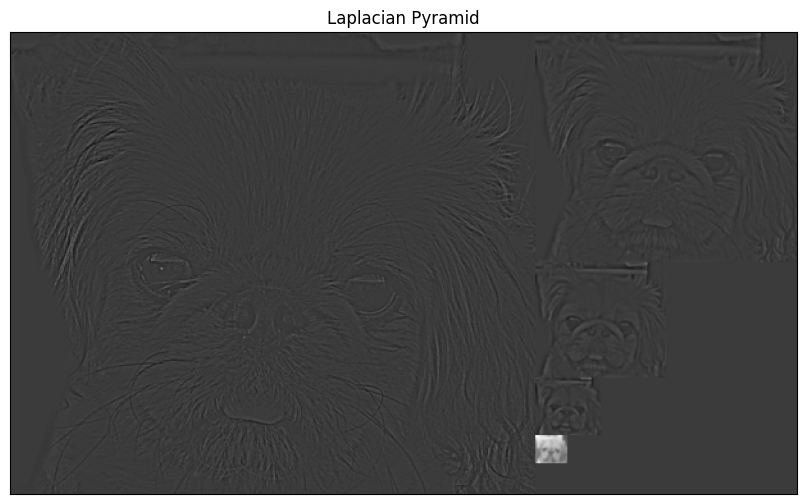

In [ ]:
def pyramidLap(im, sizeMask, nlevel=4, flagInterp=cv2.INTER_LINEAR):
    vim = pyrG = pyramidGauss(im, sizeMask=sizeMask, nlevel=nlevel)
    vimL = []
    for i in range(nlevel - 1):
        # Expand the next level's image to the current level's size
        next_level_expanded = cv2.resize(vim[i+1], (vim[i].shape[1], vim[i].shape[0]), interpolation=flagInterp)
        # Subtract the expanded image from the current level's image to get the Laplacian level
        laplacian_level = cv2.subtract(vim[i], next_level_expanded)
        # displayIm(laplacian_level, 'laplacian')
        vimL.append(laplacian_level)
    # Add the last level of the Gaussian pyramid as it is to the Laplacian pyramid
    vimL.append(vim[-1])
    return vimL

#im=cv2.imread(get_image('zebra.jpg'),0).astype(np.float64) #float for precise
im=cv2.imread(get_image('dog.bmp'),0).astype(np.float64) #float for precise
pyrL = pyramidLap(im,sizeMask=7, nlevel=4+1)
displayPyramid(pyrL,'Laplacian Pyramid') # visualiztion problem?

### Report Point 2B
- explain results
- couldn't access: https://www.eng.tau.ac.il/~ipapps/Slides/lecture05.pdf
- explain: upsampled
- explain the process of reverse loop
- cv2.INTER_LINEAR is a common choice that uses linear interpolation.
- vimL.insert(0, laplacian) -> This means that each newly computed Laplacian image becomes the first item in the list, pushing the previously inserted images down the list.
- results not as expected:more black
- level issue

## C) (0.5 points)

Now implement a function to reconstruct the image encoded/stored in the Laplacian pyramid. Verify that it is possible to obtain an exact copy of the original image. To do this, calculate the reconstruction error as the Euclidean norm of the differences between the intensity levels of the original image and the reconstructed image.

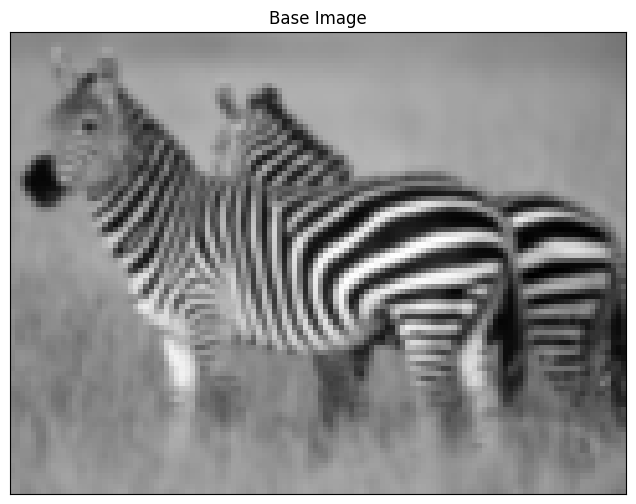

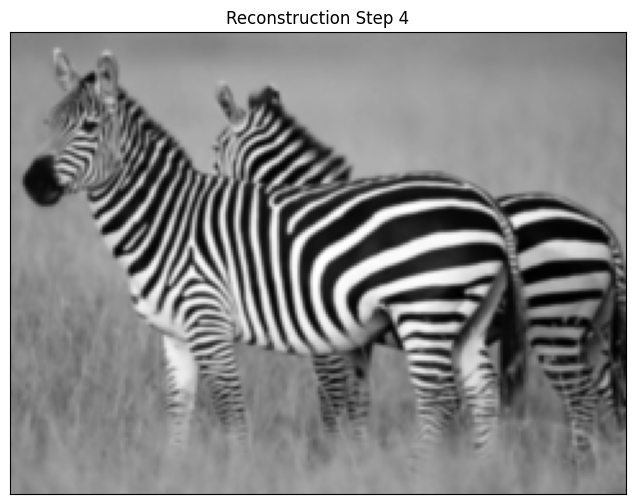

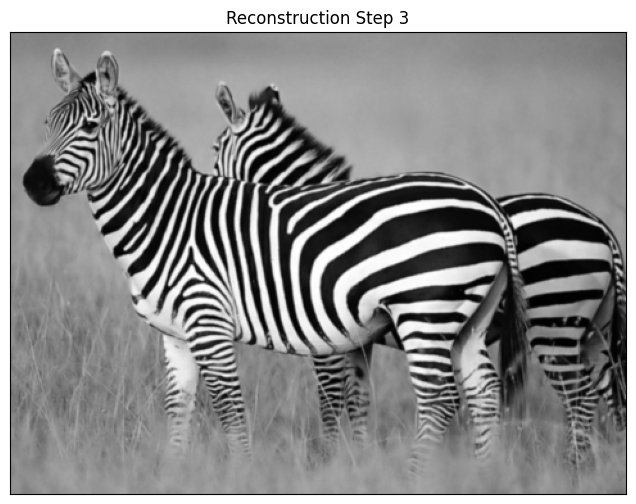

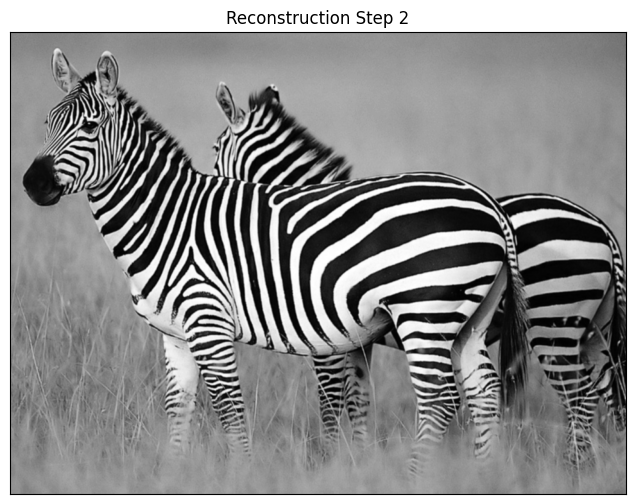

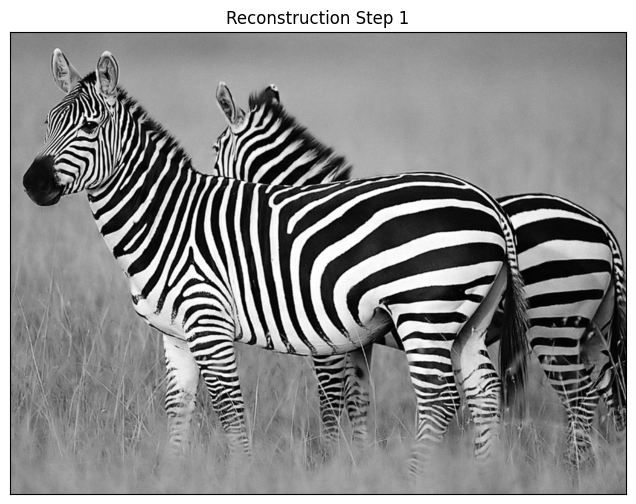

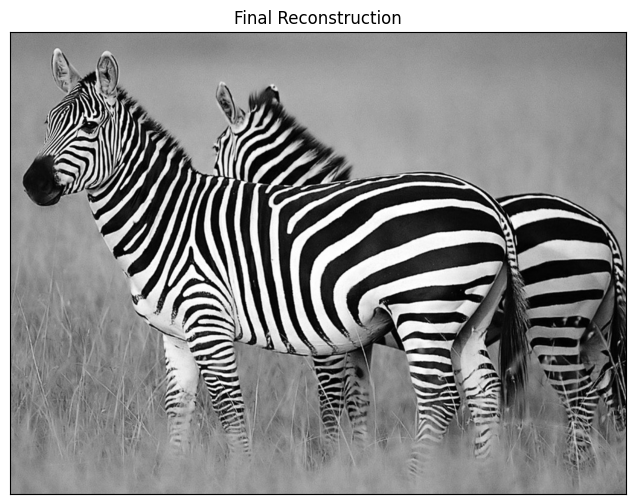

Error per pixel: 0.0


In [ ]:
def reconstructLap(pyL, flagInterp=cv2.INTER_LINEAR):
    reconstruction_steps = []  # List to store each reconstruction step
    current_level = pyL[-1]
    reconstruction_steps.append(current_level)  # Add the starting level to the steps

    for level in reversed(pyL[:-1]):
        # Expand the current image to the next level's size
        expanded = cv2.resize(current_level, (level.shape[1], level.shape[0]), interpolation=flagInterp)
        # Add the expanded image to the current level of the Laplacian pyramid
        current_level = cv2.add(expanded, level)
        # Store the current reconstruction step
        reconstruction_steps.append(current_level)

    # Reverse the list so that it starts with the finest level reconstruction
    reconstruction_steps.reverse()
    return current_level, reconstruction_steps

im=cv2.imread(get_image('zebra.jpg'),0).astype(np.float64) #float for precise
pyrL = pyramidLap(im,sizeMask=7, nlevel=4+1)
# Use the function and display the reconstruction steps
reconstructed_image, reconstruction_steps = reconstructLap(pyrL, flagInterp=cv2.INTER_LINEAR)

# Display each level of the reconstruction process in reverse order, labeling step 5 as "Base Image"
for i, step in enumerate(reversed(reconstruction_steps)):
    if i == 0:  # For the first step in reverse order (which is actually the last step)
        title = 'Base Image'
    else:
        title = f'Reconstruction Step {len(reconstruction_steps) - i}'
    displayIm(step, title=title)

displayIm(step, "Final Reconstruction")

# Calculate and print the reconstruction error
error_per_pixel = np.sqrt(np.linalg.norm(im - np.round(reconstructed_image), ord=2) / np.prod(im.shape))
print('Error per pixel:', error_per_pixel)

### Report Point 2C
- explain results
- error
- reconstruction etc
- link not working: https://www.clemson.edu/cecas/
*italicized text*

# **Exercise 3: Hybrid Images** (2 points)

This exercise is inspired on the following paper: $\textit{Oliva, A., Torralba, A., & Schyns, P. G. (2006). Hybrid images. ACM Transactions on Graphics (TOG), 25(3), 527-532}$. (https://stanford.edu/class/ee367/reading/OlivaTorralb_Hybrid_Siggraph06.pdf).  

The goal is to learn how the distance affects the human visual system when it extracts information about an object. To do this, we build a hybrid image from two images of different objects. By properly mixing part of the high frequencies of one image with part of the low frequencies of another image, we obtain a hybrid image whose perception differs with distance. The sigma used to filter both images (both high and low frequencies) is the key aspect to select the high and low frequency range of each image. The higher the sigma value, the greater the removal of high frequencies from the image. It is recommended to choose this value separately for each of the images and, in fact, it is possible (and even desirable) to have different values for different pairs of images. Remember to use the Gaussian pyramid to show the effect obtained.

In particular, the students are required to generate, at least, the hybrid images corresponding to Einstein-Marilyn, Cat-Dog, and Fish-Submarine, as shown below.

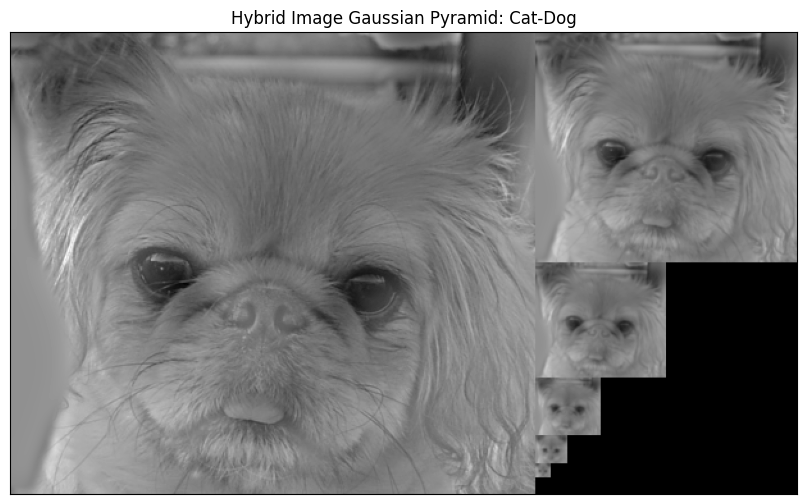

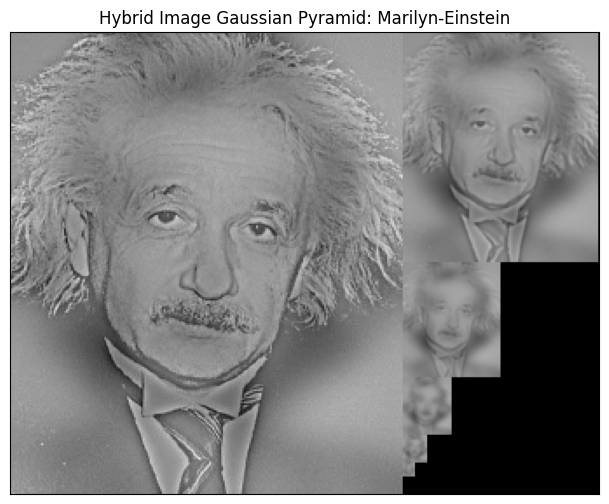

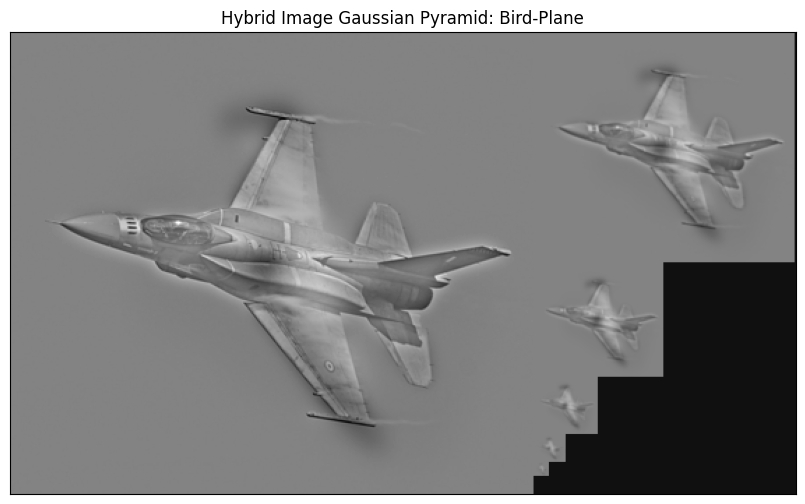

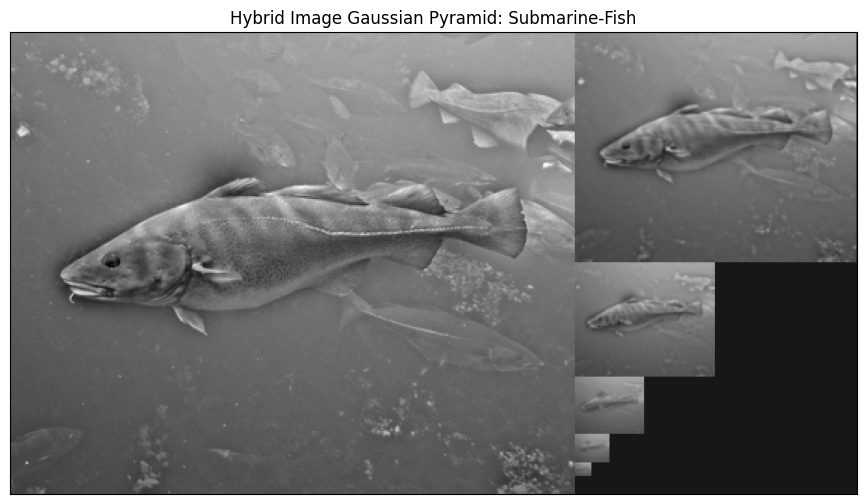

In [ ]:
def low_high_frequency(im, sigma):
    # Apply Gaussian blur to get the low-frequency component remember [0,0] was gaussian
    low_freq = my2DConv(im, sigma, [0, 0])

    # Subtract the blurred image from the original image to get the high-frequency component
    high_freq = cv2.subtract(im, low_freq)

    return low_freq, high_freq

def hybrid_image(im1_low, im2_high, sigma1, sigma2):
    # Generate low-frequency component of the first image
    low_freq1, _ = low_high_frequency(im1_low, sigma1)

    # Generate high-frequency component of the second image
    _, high_freq2 = low_high_frequency(im2_high, sigma2)

    # Combine the two frequency components
    hybrid = cv2.add(low_freq1, high_freq2)

    return hybrid

# Read images Einstein-Marilyn, Cat-Dog, Fish-Submarine and Plane-Bird
im1_low_cat = cv2.imread(get_image('cat.bmp'), 0).astype(np.float64)
im2_high_dog = cv2.imread(get_image('dog.bmp'), 0).astype(np.float64)
im1_low_marilyn = cv2.imread(get_image('marilyn.bmp'), 0).astype(np.float64)
im2_high_einstein = cv2.imread(get_image('einstein.bmp'), 0).astype(np.float64)
im1_low_bird = cv2.imread(get_image('bird.bmp'), 0).astype(np.float64)
im2_high_plane = cv2.imread(get_image('plane.bmp'), 0).astype(np.float64)
im1_low_submarine = cv2.imread(get_image('submarine.bmp'), 0).astype(np.float64)
im2_high_fish = cv2.imread(get_image('fish.bmp'), 0).astype(np.float64)

# Custom sigma selection - values might need to be adjusted separately - i experimented
sigma_cat = 12
sigma_dog = 7
sigma_marilyn = 10
sigma_einstein = 3
sigma_bird = 8
sigma_plane = 5
sigma_submarine = 9
sigma_fish = 6

# Generate hybrid images - high images would be shown when zoomed and lower with small
hybrid_im_cat_dog = hybrid_image(im1_low_cat, im2_high_dog, sigma_cat, sigma_dog)
hybrid_im_marilyn_einstein = hybrid_image(im1_low_marilyn, im2_high_einstein, sigma_marilyn, sigma_einstein)
hybrid_im_bird_plane = hybrid_image(im1_low_bird, im2_high_plane, sigma_bird, sigma_plane)
hybrid_im_submarine_fish = hybrid_image(im1_low_submarine, im2_high_fish, sigma_submarine, sigma_fish)

# Build Gaussian pyramids for the hybrid images
sizeMask = 7
hybrid_pyr_cat_dog = pyramidGauss(hybrid_im_cat_dog, sizeMask=sizeMask, nlevel=6)
hybrid_pyr_marilyn_einstein = pyramidGauss(hybrid_im_marilyn_einstein, sizeMask=sizeMask, nlevel=6)
hybrid_pyr_bird_plane = pyramidGauss(hybrid_im_bird_plane, sizeMask=sizeMask, nlevel=6)
hybrid_pyr_submarine_fish = pyramidGauss(hybrid_im_submarine_fish, sizeMask=sizeMask, nlevel=6)

# Display the pyramids with labels
displayPyramid(hybrid_pyr_cat_dog, 'Hybrid Image Gaussian Pyramid: Cat-Dog')
displayPyramid(hybrid_pyr_marilyn_einstein, 'Hybrid Image Gaussian Pyramid: Marilyn-Einstein')
displayPyramid(hybrid_pyr_bird_plane, 'Hybrid Image Gaussian Pyramid: Bird-Plane')
displayPyramid(hybrid_pyr_submarine_fish, 'Hybrid Image Gaussian Pyramid: Submarine-Fish')


### Report Point 3
Hybrid images are generated by superimposing two images at two
different spatial scales: the low-spatial scale is obtained by filtering
one image with a low-pass filter; the high spatial scale is obtained
by filtering a second image with a high-pass filter
ref: https://stanford.edu/class/ee367/reading/OlivaTorralb_Hybrid_Siggraph06.pdf

In the following section we describe the motivation behind hybrid
images, as they relate to studies in human perception.

In a hybrid image it is important that the
alternative image is perceived as noise (lacking internal organization) or that it blends with the dominant subband.

---
Peak sensitivity at 12
http://olivalab.mit.edu/publications/Talk_Hybrid_Siggraph06.pdf

Alignment - how to add images in collab?

- sigma relationship:

sigma_marilyn = 10
sigma_einstein = 3

- found by exp increasing for sigma_marilyn and decreasing for sigma_einstein would make more sigma_marilyn visible
- were having troubles to adjust the sigma, with same sigma it was kinda tricky to visualize.

The choice of sigma1 depends on how much detail you want to remain visible at close viewing distances.

The larger the sigma2, the more of the low-frequency content is removed in this subtraction process, leaving behind the high-frequency details (edges and textures).


# **Exercise 4: Pyramid Blending** (1 point)

In this exercise you must create the merged image (horizontal) of the apple (`apple.jpg`) and the orange (`orange.jpg`) using the $\textit{Pyramid Blending}$ technique. It is recommended to use the OpenCV functions `pyrDown` and `pyrUp` (and explain its working/functioning). It is also essential to explain in detail the process followed when creating the new image (mixture of both), and the blending effect in the resulting image should be appropriate (like in the example displayed below).  



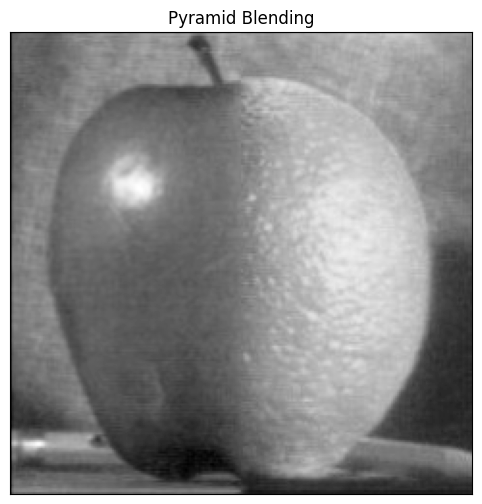

In [ ]:
# greyscale
def blend_images_opencv(img1, img2, mask, levels=4):
    # Initialize Gaussian pyramids
    gauss_pyr_1 = [img1]
    gauss_pyr_2 = [img2]
    gauss_mask = [mask.astype(float)]  # Convert mask to float

    # Build Gaussian pyramids for the images and mask
    for _ in range(levels):
        img1 = cv2.pyrDown(gauss_pyr_1[-1])
        img2 = cv2.pyrDown(gauss_pyr_2[-1])
        mask = cv2.pyrDown(gauss_mask[-1]).astype(float)
        gauss_pyr_1.append(img1)
        gauss_pyr_2.append(img2)
        gauss_mask.append(mask)

    # Initialize Laplacian pyramids
    lap_pyr_1 = [gauss_pyr_1[-1]]
    lap_pyr_2 = [gauss_pyr_2[-1]]

    # Build Laplacian pyramids for the images
    for i in range(levels, 0, -1):
        lap_1 = cv2.subtract(gauss_pyr_1[i-1], cv2.pyrUp(gauss_pyr_1[i], dstsize=gauss_pyr_1[i-1].shape[::-1]))
        lap_2 = cv2.subtract(gauss_pyr_2[i-1], cv2.pyrUp(gauss_pyr_2[i], dstsize=gauss_pyr_2[i-1].shape[::-1]))
        lap_pyr_1.append(lap_1)
        lap_pyr_2.append(lap_2)

    # Blend the Laplacian pyramids using the Gaussian pyramid of the mask
    blended_pyr = []
    gauss_mask_reversed = gauss_mask[::-1]
    for lap1, lap2, mask in zip(lap_pyr_1, lap_pyr_2, gauss_mask_reversed):
        blended = lap1 * mask + lap2 * (1 - mask)
        blended_pyr.append(blended)

    # Collapse the blended pyramid to get the final image
    blended_image = blended_pyr[0]
    for i in range(1, len(blended_pyr)):
        # Compute the expected size after pyrUp
        expected_rows = blended_pyr[i].shape[0]
        expected_cols = blended_pyr[i].shape[1]
        # Upsample and ensure the size matches the expected size by specifying dstsize
        blended_image = cv2.pyrUp(blended_image, dstsize=(expected_cols, expected_rows))
        # Add the upsampled image to the current layer of the Laplacian pyramid
        blended_image = cv2.add(blended_image, blended_pyr[i])

    return blended_image

# Read the two images
apple = cv2.imread(get_image('apple.jpg'), 0).astype(np.float64)
orange = cv2.imread(get_image('orange.jpg'), 0).astype(np.float64)

# RGB not implemented yet
# apple = cv2.imread(get_image('apple.jpg'), 1).astype(np.float64)
# orange = cv2.imread(get_image('orange.jpg'), 1).astype(np.float64)

apple_resized = cv2.resize(apple, (orange.shape[1], orange.shape[0]), interpolation=cv2.INTER_LINEAR)

# Create a mask with left half ones and right half zeros - mask_vertical
mask = np.zeros_like(orange, dtype=float)
mask[:, :mask.shape[1] // 2] = 1.0

# mask_horizontal
# mask = np.zeros_like(orange, dtype=float)
# mask[:mask.shape[0] // 2, :] = 1.0

# mask_diagonal
#mask = np.eye(orange.shape[0], orange.shape[1], dtype=float)

# mask_antidiagonal
#mask = np.flip(np.eye(orange.shape[0], orange.shape[1], dtype=float), axis=1)

# Blend the images
blended_opencv = blend_images_opencv(apple_resized, orange, mask)
#blended_opencv = blend_images_opencv(orange, apple_resized, mask)

displayIm(blended_opencv, "Pyramid Blending")

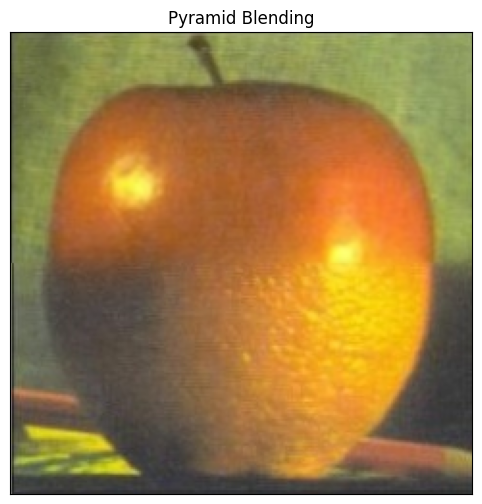

In [ ]:
# rgb
def blend_images_opencv(img1, img2, mask, levels=4):
    # Convert the mask to 3 channels to match the RGB images
    if len(img1.shape) == 3:
      mask_3channel = np.stack([mask, mask, mask], axis=-1)

    # Initialize Gaussian pyramids
    gauss_pyr_1 = [img1.astype(float)]  # Convert to float for precision
    gauss_pyr_2 = [img2.astype(float)]
    gauss_mask = [mask_3channel.astype(float)]  # Ensure mask is float

    # Build Gaussian pyramids for the images and mask
    for _ in range(levels):
        img1 = cv2.pyrDown(gauss_pyr_1[-1])
        img2 = cv2.pyrDown(gauss_pyr_2[-1])
        mask = cv2.pyrDown(gauss_mask[-1])
        gauss_pyr_1.append(img1)
        gauss_pyr_2.append(img2)
        gauss_mask.append(mask)

    # Initialize Laplacian pyramids
    lap_pyr_1 = [gauss_pyr_1[-1]]
    lap_pyr_2 = [gauss_pyr_2[-1]]

    # Build Laplacian pyramids for the images
    for i in range(levels, 0, -1):
        lap_1 = cv2.subtract(gauss_pyr_1[i-1], cv2.pyrUp(gauss_pyr_1[i], dstsize=gauss_pyr_1[i-1].shape[1::-1]))
        lap_2 = cv2.subtract(gauss_pyr_2[i-1], cv2.pyrUp(gauss_pyr_2[i], dstsize=gauss_pyr_2[i-1].shape[1::-1]))
        lap_pyr_1.append(lap_1)
        lap_pyr_2.append(lap_2)

    # Blend the Laplacian pyramids using the Gaussian pyramid of the mask
    blended_pyr = []
    gauss_mask_reversed = gauss_mask[::-1]
    for lap1, lap2, mask in zip(lap_pyr_1, lap_pyr_2, gauss_mask_reversed):
        # Element-wise multiplication and addition for blending
        blended = cv2.add(lap1 * mask, lap2 * (1.0 - mask))
        blended_pyr.append(blended)

    # Collapse the blended pyramid to get the final image
    blended_image = blended_pyr[0]
    for i in range(1, len(blended_pyr)):
        # Compute the expected size after pyrUp
        expected_rows = blended_pyr[i].shape[0]
        expected_cols = blended_pyr[i].shape[1]
        # Upsample and ensure the size matches the expected size by specifying dstsize
        blended_image = cv2.pyrUp(blended_image, dstsize=(expected_cols, expected_rows))
        # Add the upsampled image to the current layer of the Laplacian pyramid
        blended_image = cv2.add(blended_image, blended_pyr[i])

    # Convert the result back to 8-bit for display
    blended_image = np.clip(blended_image, 0, 255).astype(np.uint8)
    return blended_image

# Read the two images
apple = cv2.imread(get_image('apple.jpg'), 1).astype(np.float64)
orange = cv2.imread(get_image('orange.jpg'), 1).astype(np.float64)

# apple = cv2.imread(get_image('morgan_freeman.jpg'), 1).astype(np.float64)
# orange = cv2.imread(get_image('face.bmp'), 1).astype(np.float64)

# Ensure both images are the same size
apple_resized = cv2.resize(apple, (orange.shape[1], orange.shape[0]), interpolation=cv2.INTER_LINEAR)

# Create a grayscale mask with left half ones and right half zeros - vertical
mask = np.zeros((orange.shape[0], orange.shape[1]), dtype=np.float64)
#mask[:, :mask.shape[1] // 2] = 1.0

#  - horizontal
mask[:mask.shape[0] // 2, :] = 1.0

# Blend the images
blended_opencv = blend_images_opencv(apple_resized, orange, mask)
blended_opencv_rgb = cv2.cvtColor(blended_opencv, cv2.COLOR_BGR2RGB)

# Display the result
#displayIm(blended_opencv, "Pyramid Blending") # blue!
displayIm(blended_opencv_rgb, "Pyramid Blending")


### Report Point 4
- https://becominghuman.ai/image-blending-using-laplacian-pyramids-2f8e9982077f
- the image at the last helped bigtime
- wanted to upload screenshots from references and slides to better explain, but couldnt as we are using the same images.
- why 1-GR? for the 2nd image?
- shapes (240,240) (239,238) problem
- mask ordering problem, as its guassian and others are lap
- had to reverse: gauss_mask_reversed = gauss_mask[::-1]
- started with greyscale
- converted to rgb
- number of levels? how we define?
- OpenCV reads images in BGR format by default, not RGB?
- they were
- pyrup - pyr down, sigma etc